In [39]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import nltk
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\420potatopc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\420potatopc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df_true = pd.read_csv("C:/Users/420potatopc/Desktop/fake news detector/Data_uji.csv")
df_fake = pd.read_csv("C:/Users/420potatopc/Desktop/fake news detector/Data_latih.csv")

In [41]:
df_true['target'] = 1
df_fake['target'] = 0
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df['original'] = df['narasi'] + ' ' + df['judul']
df.head()

,ID,tanggal,judul,narasi,nama file gambar,target,label,original
0,238057,13-Jul-20,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg,1,NaN,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...
1,238158,6-Jul-20,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg,1,NaN,Seberat beratnya Pekerjaan Akan terasa ringan ...
2,238865,22-Apr-20,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg,1,NaN,Hindu di india melemparkan patung buatan merek...
3,248298,22-Oct-19,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg,1,NaN,Mulai Hari ini di RSCM mulai diPraktekkan Peny...
4,255176,1-May-20,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg,1,NaN,"Untuk sekedar info, Bagi anda yg punya ansuran..."


In [42]:
df.isnull().sum()

ID                    0
tanggal               0
judul                 0
narasi                0
nama file gambar      0
target                0
label               470
original              0
dtype: int64

DATA CLEANING

In [60]:
stop_words = stopwords.words("indonesian")
stop_words.extend ([
    "ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir",
    "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar",
    "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya",
    "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan",
    "bagaimana", "bagaimanakah", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal",
    "bakalan", "balik", "banyak", "bapak", "baru", "bawah", "beberapa", "begini", "beginian", "beginikah",
    "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan",
    "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah",
    "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai",
    "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata",
    "berkehendak", "berkeinginan", "berkenaan", "berlainan", "berlalu", "berlangsung", "berlebihan",
    "bermacam", "bermacam-macam", "bermaksud", "bermula", "bersama", "bersama-sama", "bersiap", "bersiap-siap",
    "bertanya", "bertanya-tanya", "berturut", "berturut-turut", "bertutur", "berujar", "berupa", "besar",
    "betul", "betulkah", "biasa", "biasanya", "bila", "bilakah", "bisa", "bisakah", "boleh", "bolehkah",
    "bolehlah", "buat", "bukan", "bukankah", "bukanlah", "bukannya", "bulan", "bung", "cara", "caranya",
    "cukup", "cukupkah", "cukuplah", "cuma", "dahulu", "dalam", "dan", "dapat", "dari", "daripada", "datang",
    "dekat", "demi", "demikian", "demikianlah", "dengan", "depan", "di", "dia", "diakhiri", "diakhirinya",
    "dialah", "diantara", "diantaranya", "diberi", "diberikan", "diberikannya", "dibuat", "dibuatnya",
    "didapat", "didatangkan", "digunakan", "diibaratkan", "diibaratkannya", "diingat", "diingatkan",
    "diinginkan", "dijawab", "dijelaskan", "dijelaskannya", "dikarenakan", "dikatakan", "dikatakannya",
    "dikerjakan", "diketahui", "diketahuinya", "dikira", "dilakukan", "dilalui", "dilihat", "dimaksud",
    "dimaksudkan", "dimaksudkannya", "dimaksudnya", "dimisal", "dimulai", "dimulailah", "dimulainya",
    "dimungkinkan", "dini", "dipastikan", "diperbuat", "diperbuatnya", "dipergunakan", "diperkirakan",
    "diperlihatkan", "diperlukan", "diperlukannya", "dipersoalkan", "dipertanyakan", "disampaikan",
    "disebut", "disebutkan", "disebutkannya", "disini", "disinilah", "ditambahkan", "ditandaskan",
    "ditanya", "ditanyai", "ditanyakan", "ditegaskan", "ditujukan", "ditunjuk", "ditunjuki", "ditunjukkan",
    "ditunjukkannya", "ditunjuknya", "dituturkan", "dituturkannya", "diucapkan", "diucapkannya", "diungkapkan",
    "dong", "dua", "dulu", "empat", "enggak", "enggaknya", "entah", "entahlah", "guna", "gunakan", "hal",
    "hampir", "hanya", "hanyalah", "hari", "harus", "haruslah", "harusnya", "hendak", "hendaklah", "hendaknya",
    "hingga", "ia", "ialah", "ibarat", "ibaratkan", "ibaratnya", "ibu", "ikut", "ingat", "ingat-ingat", "ingin",
    "inginkah", "inginkan", "ini", "inikah", "inilah", "itu", "itukah", "itulah", "jangan", "jangankan", "janganlah",
    "jawab", "jawaban", "jawabnya", "jelas", "jelaskan", "jelaslah", "jelasnya", "jika", "jikalau", "juga", "jumlah",
    "jumlahnya", "justru", "kala", "kalau", "kalaulah", "kalaupun", "kalian", "kami", "kamilah", "kamu", "kamulah",
    "kan", "kapan", "kapankah", "kapanpun", "karena", "karenanya", "kasus", "kata", "katakan", "katakanlah", "katanya",
    "ke", "keadaan", "kebetulan", "kecil", "kedua", "keduanya", "keinginan", "kelamaan", "kelihatan", "kelihatannya",
    "kelima", "kemudian", "kemungkinan", "kemungkinannya", "kepada", "kepadanya", "kesampaian", "keseluruhan",
    "keseluruhannya", "keterlaluan", "ketika", "khusus", "khususnya", "kini", "kinilah", "kira", "kira-kira",
    "kiranya", "kita", "kitalah", "kok", "kurang", "lama", "lamanya", "lanjut", "lanjutnya", "lebih", "lewat",
    "lima", "luar", "macam", "maka", "makanya", "makin", "malah", "malahan", "mampu", "mampukah", "mana", "manakala",
    "manalagi", "masa", "masalah", "masalahnya", "masih", "masihkah", "masing", "masing-masing", "mau", "maupun",
    "melainkan", "melakukan", "melalui", "melihat", "melihatnya", "memang", "memastikan", "memberi", "memberikan",
    "membuat", "memerlukan", "memihak", "meminta", "memintakan", "memisalkan", "memperbuat", "mempergunakan",
    "memperkirakan", "memperlihatkan", "mempersiapkan", "mempersoalkan", "mempertanyakan", "mempunyai",
    "memulai", "memungkinkan", "menaiki", "menambahkan", "menandaskan", "menanti", "menanti-nanti", "menantikan",
    "menanya", "menanyai", "menanyakan", "mendapat", "mendapatkan", "mendatang", "mendatangi", "mendatangkan",
    "menegaskan", "mengakhiri", "mengapa", "mengatakan", "mengatakannya", "mengenai", "mengerjakan",
    "mengerti", "menghendaki", "mengibaratkan", "mengibaratkannya", "menginginkan", "mengira", "mengucapkan",
    "mengucapkannya", "mengungkapkan", "menjadi", "menjawab", "menuju", "menunjuk", "menunjuki", "menunjukkan",
    "menunjuknya", "menurut", "menuturkan", "menyampaikan", "menyangkut", "menyatakan", "menyebutkan", "menyeluruh",
    "menyiapkan", "merasa", "mereka", "merekalah", "merupakan", "meski", "meskipun", "meyakini", "meyakinkan",
    "minta", "mirip", "misal", "misalkan", "misalnya", "mula", "mulai", "mulailah", "mulainya", "mungkin", "mungkinkah",
    "nah", "naik", "namun", "nanti", "nantinya", "nyatanya", "oleh", "olehnya", "pada", "padahal", "padanya", "pak",
    "paling", "panjang", "pantas", "para", "pasti", "pastilah", "penting", "pentingnya", "per", "percuma", "perlu",
    "perlukah", "perlunya", "pernah", "persoalan", "pertama", "pertama-tama", "pihak", "pihaknya", "pukul", "pula",
    "pun", "puncak", "saat", "saatnya", "saja", "sajalah", "salam", "saling", "sama", "sama-sama", "sambil",
    "sampai", "sana", "sangat", "sangatlah", "satu", "saya", "sayalah", "se", "sebab", "sebabnya", "sebagai", "sebagaimana",
    "sebagainya", "sebagian", "sebaik", "sebaik-baiknya", "sebaiknya", "sebaliknya", "sebanyak", "sebelum",
    "sebelumnya", "sebenarnya", "seberapa", "sebesar", "sebetulnya", "sebisanya", "sebuah", "sebut", "sebutlah",
    "sebutnya", "sedang", "sedangkan", "sedemikian", "sedikit", "sedikitnya", "seenaknya", "segala", "segalanya",
    "segera", "seharusnya", "sehingga", "seingat", "sejak", "sejauh", "sejenak", "sejumlah", "sekadar", "sekadarnya",
    "sekali", "sekali-kali", "sekalian", "sekaligus", "sekalipun", "sekarang", "sekarang", "sekecil", "seketika",
    "sekiranya", "sekitar", "sekitarnya", "sekurang-kurangnya", "sekurangnya", "sela", "selain", "selaku", "selalu",
    "selama", "selama-lamanya", "selamanya", "selanjutnya", "seluruh", "seluruhnya", "semacam", "semakin",
    "semampu", "semampunya", "semasa", "semasih", "semata", "semata-mata", "semaunya", "sementara", "sempat", "semua",
    "semuanya", "semula", "sendiri", "sendirian", "sendirinya", "seolah", "seolah-olah", "seorang", "sepanjang",
    "sepantasnya", "sepantasnyalah", "seperlunya", "seperti", "sepertinya", "sepihak", "sering", "seringnya", "serta",
    "serupa", "sesaat", "sesama", "sesampai", "sesegera", "sesekali", "seseorang", "sesuatu", "sesuatunya", "sesudah",
    "sesudahnya", "setelah", "seterusnya", "setiap", "setiba", "setibanya", "setidak-tidaknya", "setidaknya", "setinggi",
    "seusai", "sewaktu", "siap", "siapa", "siapakah", "siapapun", "sini", "sinilah", "soal", "soalnya", "suatu",
    "sudah", "sudahkah", "sudahlah", "supaya", "tadi", "tadinya", "tahu", "dijawab", "tak", "takde", "taklain", "tambah",
    "tandas", "tandasnya", "tapi", "telah", "tempat", "tengah", "tentang", "tentu", "tentulah", "tentunya", "terdahulu",
    "terhadap", "terhadapnya", "terjadi", "terjadilah", "terjadinya", "terkira", "terlalu", "terlebih", "terlihat",
    "termasuk", "ternyata", "tersampaikan", "tersebut", "tersebutlah", "tertentu", "tertuju", "terus", "terutama",
    "tetapi", "tiap", "tiba", "tiba-tiba", "tidak", "tidakkah", "tidaklah", "tiga", "tinggi", "toh", "tunjuk", "turut",
    "tutur", "tuturnya", "ucap", "ucapnya", "ujar", "ujarnya", "umum", "umumnya", "ungkap", "ungkapnya", "untuk", "usai",
    "waduh", "wah", "wahai", "waktu", "waktunya", "walau", "walaupun", "wong", "yaitu", "yakin", "yakni", "yang"
])


def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [61]:
# What is the distribution of Subjects between the True and Fake News? 
sub_tf_df=df.groupby('target').apply(lambda x:x['judul'].count()).reset_index(name='Counts')
sub_tf_df['target'].replace({0: 'False', 1: 'True'}, inplace=True)
fig = px.bar(sub_tf_df, x="target", y="Counts", color='Counts', barmode='group', height=400)
fig.show()

DATA PROCESSING

In [62]:
df['clean_title'] = df['judul'].apply(preprocess)
df['clean_title'][0]

['narasi',
 'tito',
 'karnavian',
 'berideologi',
 'komunis',
 'disekolahkan',
 'partai',
 'komunis',
 'china',
 'beijing']

In [63]:
df['clean_joined_title']=df['clean_title'].apply(lambda x:" ".join(x))

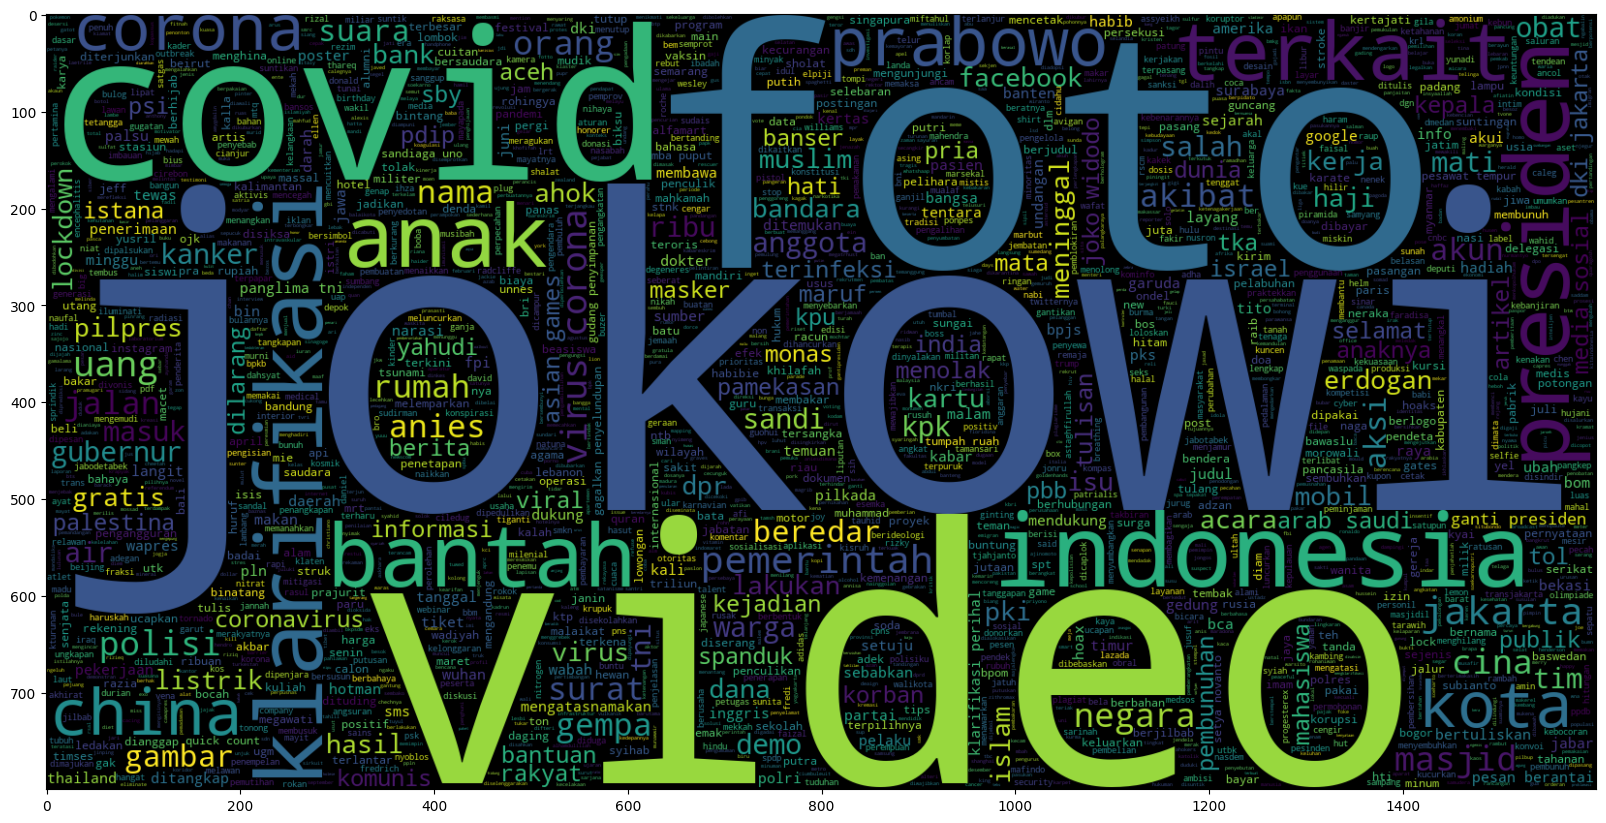

In [64]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

word distribution

In [55]:
maxlen = -1
for doc in df.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_title], nbins = 50)
fig.show()

The maximum number of words in a title is = 21


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_title, df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [66]:
model = LogisticRegression(C=2)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.495243757431629


<Axes: >

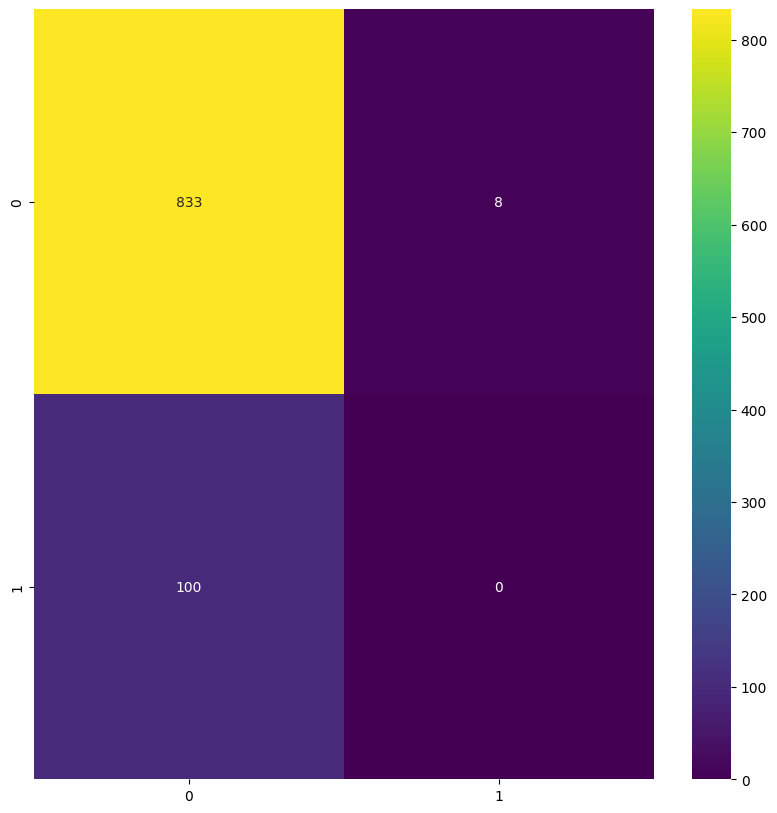

In [67]:
cm = confusion_matrix(list(y_test), predicted_value)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

check content fake or not

In [69]:
df['clean_text'] = df['narasi'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

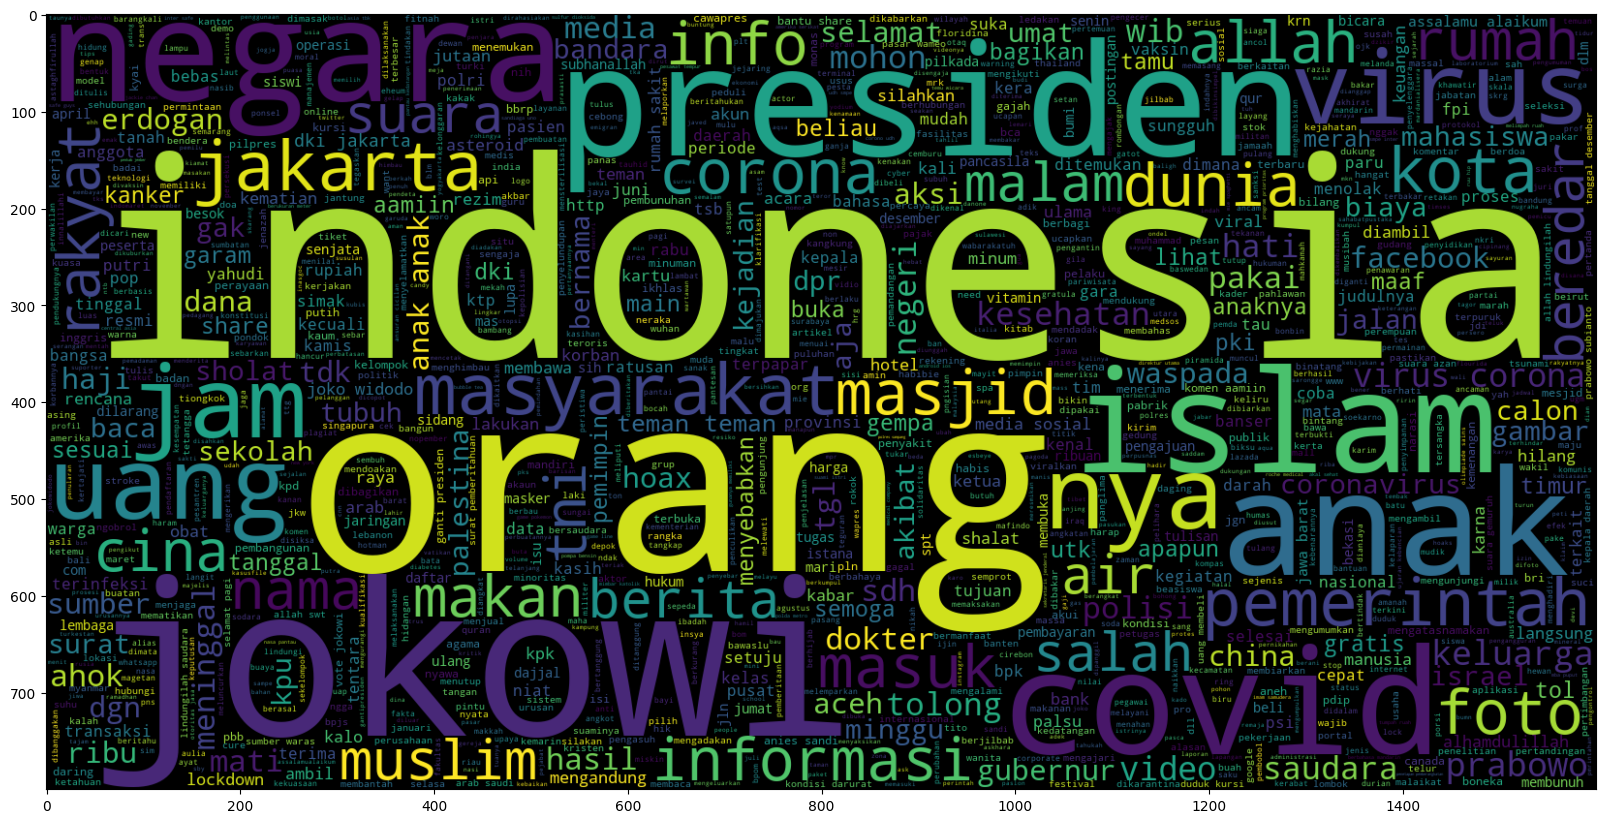

In [70]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_text))
plt.imshow(wc, interpolation = 'bilinear')

In [71]:
maxlen = -1
for doc in df.clean_joined_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_text], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 152


In [73]:

X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_text, df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.49727110582639716


<Axes: >

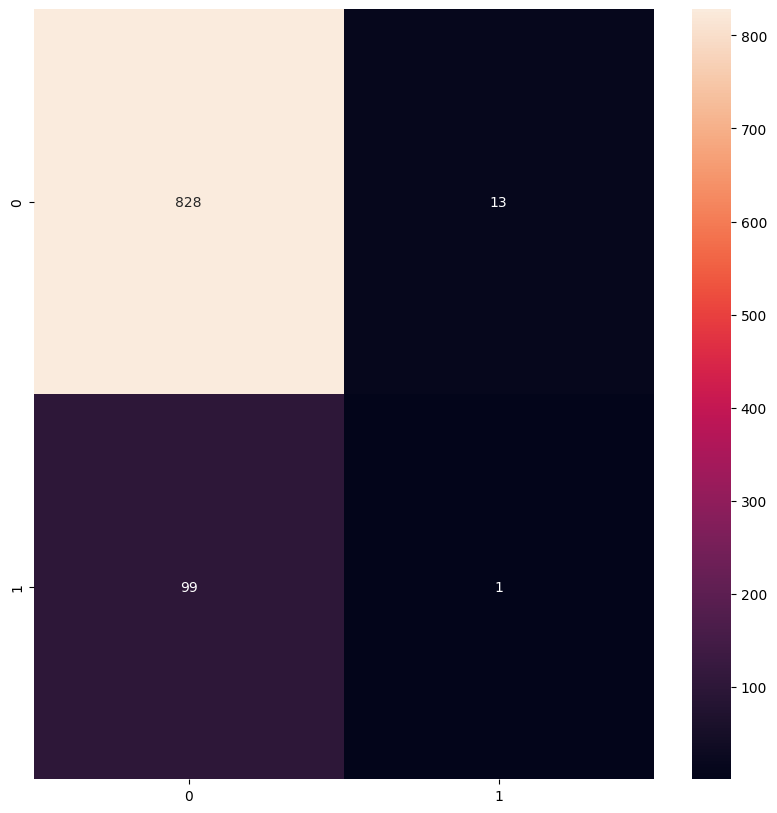

In [74]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')